Práctica 1 (impacto de las restricciones de tráfico en la calidad del aire)


Objetivo: 
El 30 de diciembre de 2016 el Ayuntamiento de Madrid empieza a restringir el tráfico al centro de la ciudad
mediante la aplicación del escenario 3 del protocolo de contaminación. Esta fue la primera vez que se aplicó
un escenario tan restrictivo. Demuestra mediante visualizaciones de datos que ha ocurrido después de ello.
Para dicho problema, haremos uso de un dataset con datos sobre la calidad del aire en Madrid desde 2001. El
dataset contiene un archivo csv por año. Dentro de cada uno de ellos habrá medidas diarias de distintas
estaciones. Estas estaciones miden diferentes parámetros y no siempre todos se registran en cada una de las
estaciones.
https://www.kaggle.com/decide-soluciones/air-quality-madrid/downloads/csvs_per_year.zip/5

Importación de librerías

In [14]:
import pandas as pd
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1.- (1 punto) Lo primero que tendremos que hacer es cargar todos los archivos csv en un mismo DataFrame
para poder manipularlos. Habrá que comprobar si existen datos redundantes o anómalos.
Para medir la calidad del aire de un día obtendremos el valor de cada estación meteorológica ese día y
después calcularemos la media de estos. El primer valor se estimará teniendo en cuenta la tabla que se
encuentra más abajo. Después habrá que hacer una transformación de valores continuos a categóricos.
Proporcionar dicha información en un DataFrame y luego guardarlo en un archivo csv.
La calidad del aire general es igual al peor índice de las cinco partículas que se muestran en la tabla siguente.

Muestro la estructura del dataframe:

In [ ]:
# Ruta de los archivos CSV
csv_path = "./csvs_per_year/"

# Obtener la lista de archivos CSV ordenados
csv_files = sorted(glob.glob(os.path.join(csv_path, "madrid_*.csv")))

# Verificar que se encontraron archivos
if not csv_files: #si es falso
    raise FileNotFoundError("No se encontraron los archivos CSV en la ruta ./csvs_per_year/")

# Cargar los archivos en un único DataFrame, uso el separador ","
df_list = [pd.read_csv(file, sep=",", encoding="latin1", low_memory=False) for file in csv_files]

# Unir todos los DataFrames en uno solo
df = pd.concat(df_list, ignore_index=True)


# Mostrar las primeras filas
df.head()

# Ver columnas y tipos de datos
df.info()

# Resumen estadístico de los datos numéricos
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   MXY      float64
 5   NMHC     float64
 6   NO_2     float64
 7   NOx      float64
 8   OXY      float64
 9   O_3      float64
 10  PM10     float64
 11  PXY      float64
 12  SO_2     float64
 13  TCH      float64
 14  TOL      float64
 15  station  int64  
 16  PM25     float64
 17  NO       float64
 18  CH4      float64
dtypes: float64(17), int64(1), object(1)
memory usage: 552.0+ MB


,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
count,1.041684e+06,2.651012e+06,1.001724e+06,315415.000000,1.085312e+06,3.787050e+06,2.376275e+06,315695.000000,2.991732e+06,2.861255e+06,315584.000000,2.775960e+06,1.086441e+06,1.038929e+06,3.808224e+06,816424.000000,1.532397e+06,14850.000000
mean,1.257431e+00,5.503838e-01,1.407927e+00,4.650394,1.873865e-01,5.047151e+01,1.093188e+02,2.280912,3.982616e+01,2.893654e+01,2.056178,1.065539e+01,1.435882e+00,5.876842e+00,2.807903e+07,13.738292,2.343886e+01,1.300849
std,1.910831e+00,5.354483e-01,2.146109e+00,5.599223,1.539529e-01,3.455288e+01,1.102871e+02,2.639609,3.039249e+01,2.594859e+01,2.395130,9.121267e+00,2.332228e-01,8.524460e+00,2.028574e+01,11.214146,5.021504e+01,0.195550
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,2.807900e+07,-31.000000,0.000000e+00,0.020000
25%,2.100000e-01,2.600000e-01,3.500000e-01,1.200000,9.000000e-02,2.400000e+01,4.000000e+01,0.960000,1.271000e+01,1.150000e+01,0.800000,5.840000e+00,1.300000e+00,1.100000e+00,2.807901e+07,6.450000,2.000000e+00,1.170000
50%,6.000000e-01,4.000000e-01,8.800000e-01,2.800000,1.500000e-01,4.400000e+01,7.615000e+01,1.320000,3.486000e+01,2.149000e+01,1.280000,8.150000e+00,1.380000e+00,3.160000e+00,2.807902e+07,11.000000,6.000000e+00,1.250000
75%,1.500000e+00,6.500000e-01,1.580000e+00,5.890000,2.400000e-01,6.958000e+01,1.397000e+02,2.740000,5.999000e+01,3.775000e+01,2.510000,1.230000e+01,1.510000e+00,6.990000e+00,2.807904e+07,17.670000,2.000000e+01,1.400000
max,6.639000e+01,1.804000e+01,1.622000e+02,177.600006,9.070000e+00,6.286000e+02,2.537000e+03,103.000000,2.360000e+02,6.950000e+02,106.000000,1.991000e+02,1.048000e+01,2.429000e+02,2.807910e+07,506.899994,1.146000e+03,3.920000


In [3]:
#Convierto "date" a formato fecha
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df.dtypes

date       datetime64[ns]
BEN               float64
CO                float64
EBE               float64
MXY               float64
NMHC              float64
NO_2              float64
NOx               float64
OXY               float64
O_3               float64
PM10              float64
PXY               float64
SO_2              float64
TCH               float64
TOL               float64
station             int64
PM25              float64
NO                float64
CH4               float64
dtype: object

### Limpieza de datos

In [4]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)
key_columns = ["PM10", "PM25", "NO_2", "O_3", "SO_2"]

# Eliminar filas donde todas las columnas clave sean nulas
df = df.dropna(subset=key_columns, how="all")

# Rellenar valores nulos con la media de la estación
for col in key_columns:
    df[col] = df.groupby("station")[col].transform(lambda x: x.fillna(x.mean()))

### Cálculo de la calidad del aire

Calculo los valores máximos por día y por cada día tomaré el peor índice de las 5 componentes

In [7]:
# Calcular el peor valor de cada contaminante por día
key_columns = ["PM10", "PM25", "NO_2", "O_3", "SO_2"]
peor_calidad_diaria = df.groupby("date")[key_columns].max().reset_index()

# Calcular la categoría de calidad del aire usando el peor contaminante de cada día
def calidad_diaria(row):
    categories = { 
        # Muy Buena, Buena, Regular, Mala, Muy Mala
        "PM25": [15, 30, 55, 110],  
        "PM10": [25, 50, 90, 180],
        "NO_2": [50, 100, 200, 400],
        "O_3": [60, 120, 180, 240],
        "SO_2": [50, 100, 350, 500],
    }

    peor_calidad = 0
    for col, umbral in categories.items():
        value = row[col]
        if pd.isnull(value):  # Ignorar valores nulos
            continue
        if value <= umbral[0]:
            calidad = 1  # Muy Buena
        elif value <= umbral[1]:
            calidad = 2  # Buena
        elif value <= umbral[2]:
            calidad = 3  # Regular
        elif value <= umbral[3]:
            calidad = 4  # Mala
        else:
            calidad = 5  # Muy Mala
        peor_calidad = max(peor_calidad, calidad)
    return peor_calidad

# Aplicar la función para calcular el índice de calidad del aire del día
peor_calidad_diaria["Índice_Calidad_Aire"] = peor_calidad_diaria.apply(calidad_diaria, axis=1)

# Asignar etiquetas de calidad
valor_calidad = {
    1: "Muy Buena",
    2: "Buena",
    3: "Regular",
    4: "Mala",
    5: "Muy Mala",
}
peor_calidad_diaria["Categoría_Calidad_Aire"] = peor_calidad_diaria["Índice_Calidad_Aire"].map(valor_calidad)

# Mostrar las primeras filas del resultado
print(peor_calidad_diaria.head())
peor_calidad_diaria.to_csv("daily_air_quality.csv", index=False)

                 date        PM10       PM25        NO_2        O_3  \
0 2001-01-01 01:00:00   98.379997  19.376882   81.360001  32.490002   
1 2001-01-01 02:00:00   87.010002  19.376882   93.160004  22.850000   
2 2001-01-01 03:00:00  159.399994  19.376882   90.059998  21.190001   
3 2001-01-01 04:00:00   65.239998  19.376882  114.300003  22.270000   
4 2001-01-01 05:00:00   75.000000  19.376882   87.599998  25.139999   

        SO_2  Índice_Calidad_Aire Categoría_Calidad_Aire  
0  41.770000                    4                   Mala  
1  51.950001                    3                Regular  
2  52.349998                    4                   Mala  
3  41.980000                    3                Regular  
4  35.320000                    3                Regular  






2.- (0,5 puntos) Explica visualmente como se distribuyen las calidades del aire entre buena, admisible, mala y
muy mala. Realiza para ello un pie chart. Que se puede concluir de dicho gráfico.




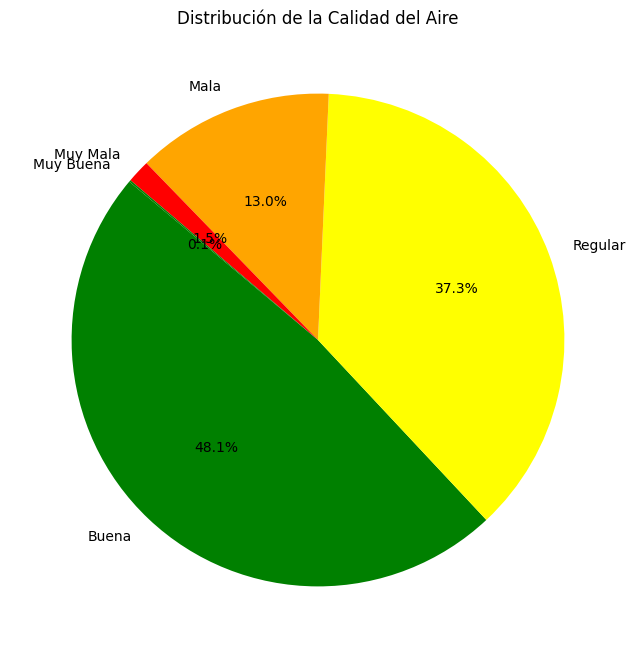

In [ ]:


# Contar la cantidad de días para cada categoría de calidad del aire
air_quality_counts = peor_calidad_diaria['Categoría_Calidad_Aire'].value_counts()

# Crear pie chart
plt.figure(figsize=(8, 8))
plt.pie(air_quality_counts, labels=air_quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'yellow', 'orange', 'red'])
plt.title('Distribución de la Calidad del Aire')
plt.show()

Conclusiones del pie chart


Buena: Si la porción de "Buena" es grande, significa que la mayoría de los días tienen una calidad del aire aceptable.


Admisible: Una porción significativa de "Admisible" indica que hay varios días con calidad del aire que no es óptima pero aún aceptable.


Mala: Una porción notable de "Mala" sugiere que hay días con calidad del aire que podría ser perjudicial para la salud.
Muy Mala: Si hay una porción considerable de "Muy Mala", significa que hay días con calidad del aire muy perjudicial para la salud.


El pie chart te permitirá ver rápidamente la proporción de días con diferentes calidades del aire y sacar conclusiones sobre la frecuencia de cada categoría.

3.- (1 punto) Una vez obtenida la calidad del aire para cada día, calcula la calidad media de cada mes para que
sea más fácil saber si la contaminación ha disminuido desde que se restringió el acceso al centro de Madrid.
Explica visualmente si los protocolos de restricciones de tráfico han tenido éxito. Utiliza para ello un diagrama
de barras. ¿Podemos encontrar la diferencia entre lo que ocurría antes de aplicar el protocolo y después?


<Figure size 1200x600 with 0 Axes>

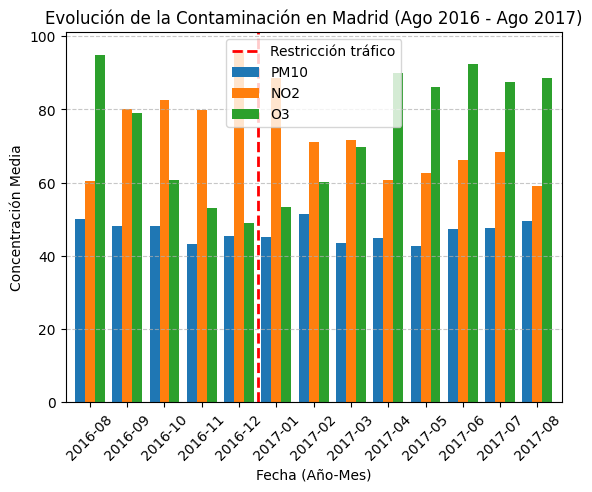

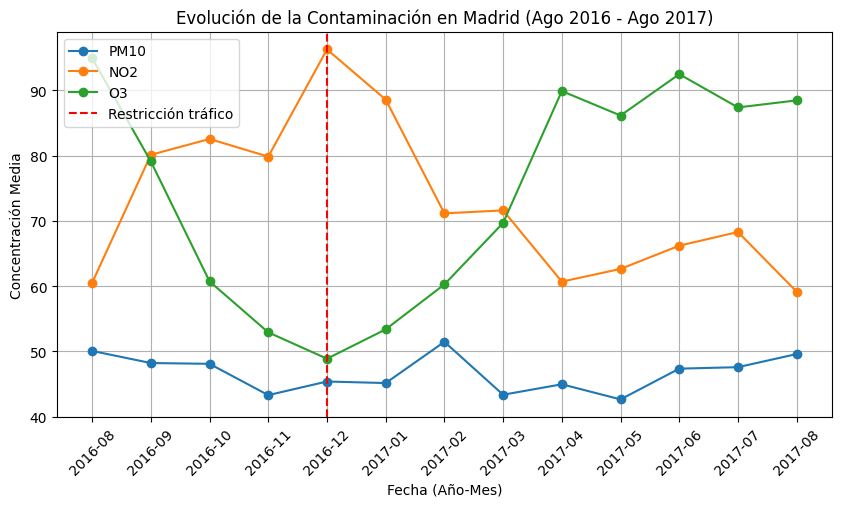

In [12]:
# Paso 1: Asegurar que 'date' es de tipo datetime
peor_calidad_diaria['date'] = pd.to_datetime(peor_calidad_diaria['date'])

# Paso 2: Agregar una columna con el año y el mes
peor_calidad_diaria['year_month'] = peor_calidad_diaria['date'].dt.to_period('M')

# Paso 3: Calcular la media mensual de cada parámetro (solo columnas numéricas)
numeric_columns = peor_calidad_diaria.select_dtypes(include=['float64', 'int64']).columns
monthly_mean = peor_calidad_diaria[numeric_columns].groupby(peor_calidad_diaria['year_month']).mean()

# Paso 4: Filtrar el rango de fechas desde agosto de 2016 hasta agosto de 2017
monthly_mean_filtered = monthly_mean.loc['2016-08':'2017-08']

# Verificar si el DataFrame filtrado está vacío
if monthly_mean_filtered.empty:
	raise ValueError("El rango de fechas seleccionado no contiene datos. Por favor, verifica las fechas.")

# Paso 5: Crear el gráfico de barras
plt.figure(figsize=(12,6))
monthly_mean_filtered[['PM10', 'NO_2', 'O_3']].plot(kind='bar', width=0.8)

# Línea de referencia para la restricción de tráfico en diciembre de 2016
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=2, label='Restricción tráfico')

# Personalización del gráfico
plt.xticks(range(len(monthly_mean_filtered.index)), monthly_mean_filtered.index.astype(str), rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Concentración Media")
plt.title("Evolución de la Contaminación en Madrid (Ago 2016 - Ago 2017)")
plt.legend(["Restricción tráfico", "PM10", "NO2", "O3"])
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Paso 6: Visualización de la evolución de la calidad del aire con un gráfico de líneas
plt.figure(figsize=(10,5))
plt.plot(monthly_mean_filtered.index.astype(str), monthly_mean_filtered['PM10'], marker='o', label='PM10')
plt.plot(monthly_mean_filtered.index.astype(str), monthly_mean_filtered['NO_2'], marker='o', label='NO2')
plt.plot(monthly_mean_filtered.index.astype(str), monthly_mean_filtered['O_3'], marker='o', label='O3')

# Línea de referencia para la restricción de tráfico (diciembre de 2016)
plt.axvline(x='2016-12', color='red', linestyle='--', label='Restricción tráfico')

plt.xticks(rotation=45)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Concentración Media")
plt.title("Evolución de la Contaminación en Madrid (Ago 2016 - Ago 2017)")
plt.legend()
plt.grid(True)
plt.show()




El gráfico muestra la evolución de la concentración media de tres contaminantes (PM10, NO2 y O3) en Madrid desde agosto de 2016 hasta agosto de 2017, con un evento clave: la restricción de tráfico en diciembre de 2016, marcada con una línea roja.

### Observaciones Generales

### Antes de la restricción (Ago 2016 - Dic 2016)
- **PM10 (azul):** Se mantiene estable con leves variaciones.
- **NO2 (naranja):** Aumenta progresivamente, alcanzando un pico en diciembre.
- **O3 (verde):** Desciende desde agosto hasta noviembre.

### Después de la restricción (Ene 2017 - Mar 2017)
- **PM10 y NO2:** Disminuyen de manera notable, sugiriendo que la restricción tuvo un impacto positivo en la reducción de la contaminación.
- **O3:** Aumenta significativamente, un fenómeno esperado ya que la reducción de NO2 puede favorecer la acumulación de ozono troposférico.

### Tendencia a largo plazo (Abr 2017 - Ago 2017)
- **PM10:** Se mantiene en niveles bajos y estables.
- **NO2:** Muestra una ligera recuperación en los meses siguientes.
- **O3:** Continúa aumentando hasta junio-julio, probablemente debido al incremento de la radiación solar en los meses cálidos.

## Conclusiones
- La restricción de tráfico en diciembre de 2016 redujo significativamente los niveles de PM10 y NO2. 
- El aumento del ozono (O3) tras la restricción es un efecto secundario esperado** debido a la menor recombinación con NO2.  
- La recuperación del NO2 en meses posteriores puede deberse a la normalización del tráfico o a factores meteorológicos.

## Resumen Final
- La restricción de tráfico tuvo un impacto positivo en la reducción de la contaminación.
- El ozono aumentó como efecto secundario, un fenómeno común en este tipo de medidas.
- Para una evaluación más completa, sería ideal analizar variables meteorológicas como lluvia y temperatura.


4,- (1 punto) Por último, queremos tratar de entender los cambios de la calidad del aire en estos últimos años.
Obtén un diagrama de cajas donde cada caja corresponda a un año y haz una interpretación de los resultados



El gráfico muestra la evolución de la calidad del aire en Madrid entre 2001 y 2018, permitiendo analizar su variabilidad y posibles cambios en la contaminación.

### Elementos Clave del Boxplot
- **Caja (rectángulo azul):** Representa el 50% central de los datos.  
- **Línea dentro de la caja:** Indica la mediana, es decir, el valor central de la distribución.  
- **Bigotes (líneas verticales):** Muestran la dispersión normal de los datos.  
- **Puntos fuera de los bigotes:** Son valores atípicos (outliers), indicando días con contaminación extrema.

### Observaciones Principales
- **Alta variabilidad entre 2001-2006**, con valores atípicos frecuentes y niveles elevados de contaminación.  
- **Desde 2007, la variabilidad se reduce**, lo que sugiere mayor estabilidad en la calidad del aire.  
- **A partir de 2016-2017, la contaminación parece disminuir**, con una mediana más baja y menor dispersión.  
- **Los valores atípicos reflejan episodios de alta contaminación**, posiblemente relacionados con condiciones meteorológicas o eventos específicos.

### Conclusión
La calidad del aire ha mostrado una tendencia a la mejora en los últimos años.La disminución de la variabilidad y la menor presencia de valores extremos pueden indicar el impacto de políticas ambientales y restricciones de tráfico.  


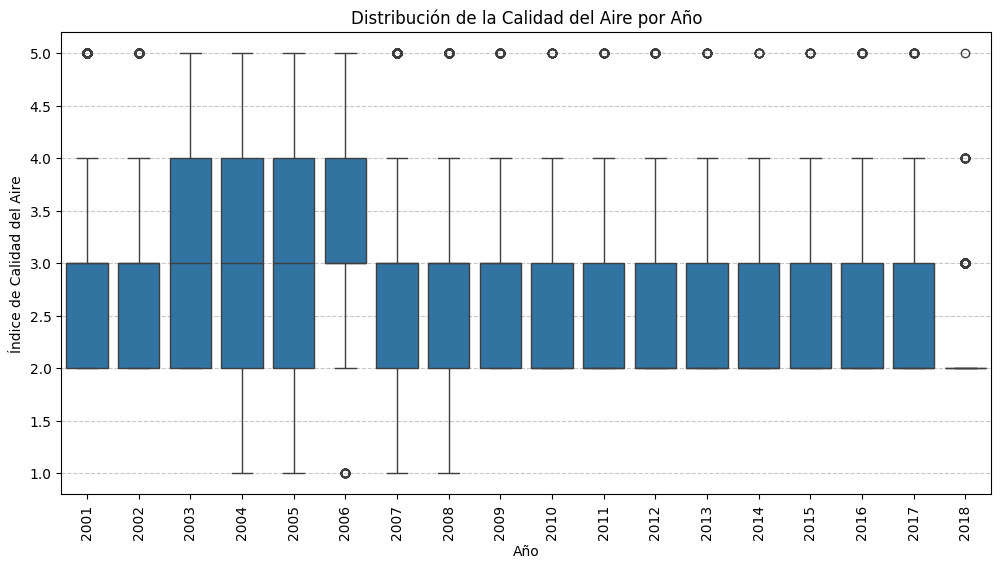

In [16]:
# Asegurarse de que la columna 'year' está presente en el DataFrame
peor_calidad_diaria['year'] = peor_calidad_diaria['date'].dt.year

# Crear el diagrama de cajas
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='Índice_Calidad_Aire', data=peor_calidad_diaria)

# Personalizar el gráfico
plt.xticks(rotation=90)
plt.xlabel('Año')
plt.ylabel('Índice de Calidad del Aire')
plt.title('Distribución de la Calidad del Aire por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()